In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Data Exploration

In [2]:
parent_path = str(os.path.dirname(os.getcwd()))

In [3]:
reds = pd.read_csv(parent_path + "/data/winequality-red.csv", delimiter = ";")

In [4]:
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


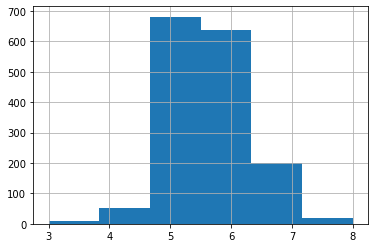

In [5]:
reds['quality'].hist(bins = 6)

In [6]:
reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
reds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


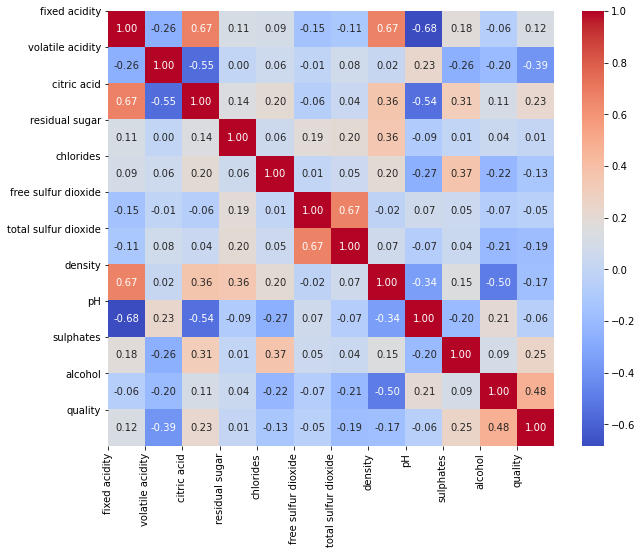

In [8]:
#correlation heat map_red wine
corr = reds.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

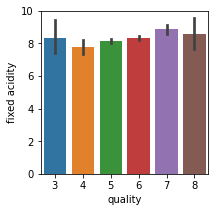

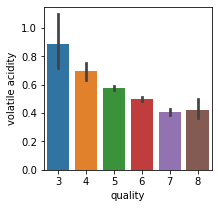

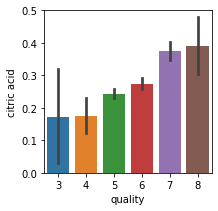

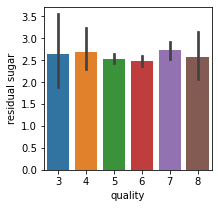

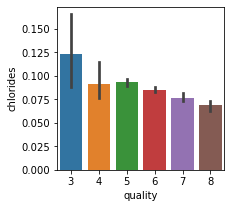

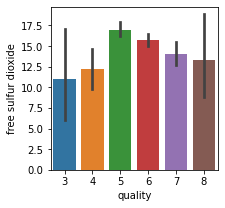

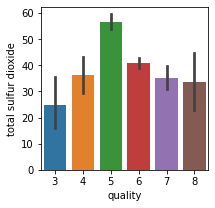

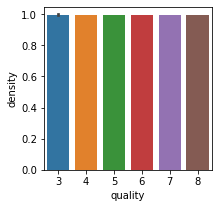

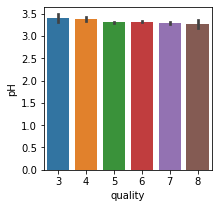

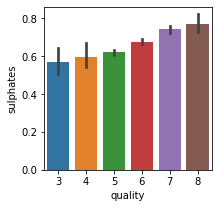

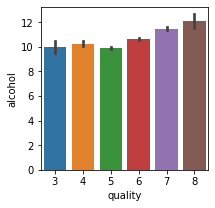

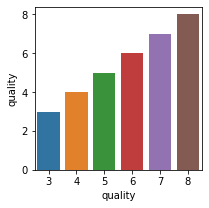

In [9]:
#visualize how does input var is related to target var,if the plot has a clear pattern, that certain input var might 
#has strong correlation to the target
#white wine

for i in list(reds.columns):
    fig = plt.figure(figsize = (3,3))
    sns.barplot(x = 'quality', y = i, data = reds)

Observing VIF

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_reds = pd.DataFrame()
vif_reds["feature"] = reds.columns[:-1]

vif_reds["VIF"] = [variance_inflation_factor(reds[reds.columns[:-1]].values, i) 
                          for i in range(len(reds[reds.columns[:-1]].columns))] 

vif_reds

,feature,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


### Feature Engineering

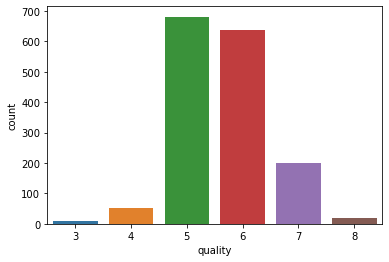

In [11]:
sns.countplot(x='quality', data=reds)

Create binary for "good" or "not good" wine based on 0-7 < quality < 7.1-10.

In [12]:
reds['is_good'] = np.where(reds['quality'] < 7, 0, 1)
reds = reds.drop(['quality'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb32841b4c0>,
      dtype=object)

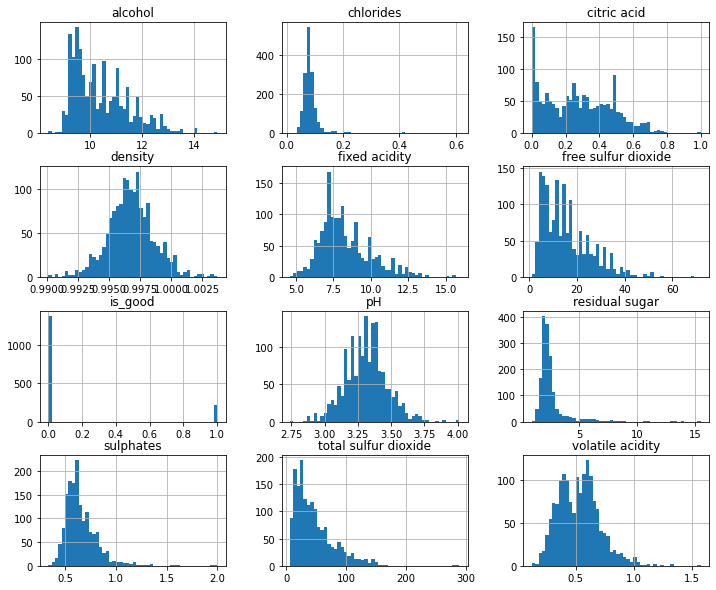

In [13]:
reds.hist(figsize = (12,10), bins = 50)

In [14]:
for i in ['alcohol', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'chlorides']:
    reds[i] = reds[i].apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3282a6d60>,
      dtype=object)

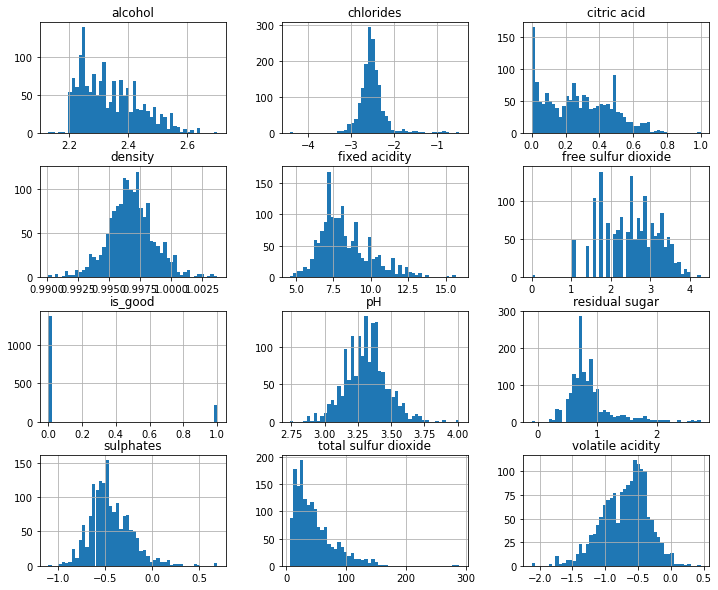

In [15]:
reds.hist(figsize = (12,10), bins = 50)

Standardize Data

In [16]:
#split x, y
reds_y = reds['is_good']
reds_x = reds.drop(['is_good'], axis=1)

In [17]:
#standardize x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(reds_x.values)
reds_x = pd.DataFrame(scaled_features, index=reds_x.index, columns=reds_x.columns)

#train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(reds_x, reds_y, test_size=0.33, random_state=42)

In [18]:
#confirm mean 0, std 1
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,-0.009297,0.031847,-0.008414,0.007097,0.010145,0.011474,0.008986,0.017304,0.022189,0.002379,-0.007183
std,0.980837,0.976196,1.005515,1.008649,1.001944,0.989161,1.003329,0.977075,1.000072,1.004867,0.996006
min,-2.137045,-4.021095,-1.391472,-2.674245,-5.861545,-3.716562,-1.230584,-3.538731,-3.700401,-2.456380,-2.132012
25%,-0.700719,-0.615926,-0.929318,-0.583150,-0.426806,-0.876138,-0.744040,-0.557404,-0.590348,-0.682683,-0.887328
50%,-0.241094,0.126113,-0.056360,-0.172877,-0.061957,0.135642,-0.257497,0.028261,-0.007213,-0.146652,-0.168232
75%,0.505795,0.713375,0.816598,0.294627,0.298111,0.727495,0.502727,0.574175,0.575922,0.584121,0.595484
max,4.355149,2.782164,3.743574,5.290907,6.153238,2.442609,7.375154,3.680055,4.528282,5.093622,3.664873


In [19]:
reds_scaled = pd.concat([reds_x, reds_y], axis = 1)

### Feature Ranking

In [20]:
from sklearn.tree import DecisionTreeClassifier

#build a decision tree with max_depth = 20 using entropy
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
dt.fit(reds_x, reds_y)

#Now use built in feature importance attribute to get MI of each feature and Y
feature_mi = dt.feature_importances_

In [21]:
feature_mi_dict_red = dict(zip(reds_x.columns.values, feature_mi))

In [22]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

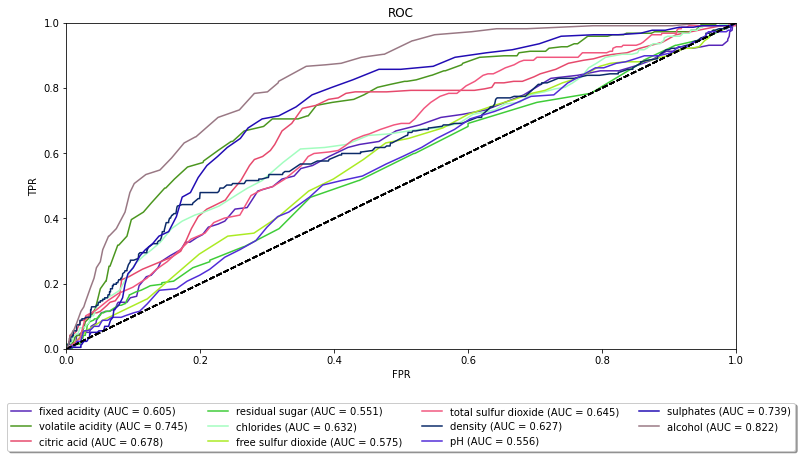

In [23]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

feature_auc_dict_red = {}
for col in reds_scaled.drop('is_good',1).columns:
    feature_auc_dict_red[col] = plotUnivariateROC(reds_scaled[col], reds_y, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [24]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict_red), columns = ['auc'])
df_mi = pd.DataFrame(pd.Series(feature_mi_dict_red), columns = ['mi'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_mi, left_index = True, right_index = True)
feat_imp_df

,auc,mi
fixed acidity,0.604954,0.056972
volatile acidity,0.745092,0.112866
citric acid,0.678216,0.058909
residual sugar,0.550760,0.052570
chlorides,0.632258,0.043678
free sulfur dioxide,0.575003,0.027492
total sulfur dioxide,0.644923,0.110345
density,0.627400,0.084533
pH,0.556085,0.055547
sulphates,0.738833,0.135450


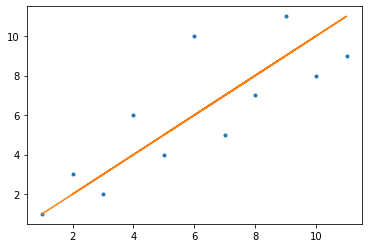

In [25]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.mi, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

In [26]:
#Now create lists of top 5 features for both auc and mi
top5_auc = list(feat_ranks[(feat_ranks.auc <= 5)].index.values)
top5_mi = list(feat_ranks[(feat_ranks.mi <= 5)].index.values)
top5_auc, top5_mi

(['volatile acidity',
  'citric acid',
  'total sulfur dioxide',
  'sulphates',
  'alcohol'],
 ['volatile acidity',
  'total sulfur dioxide',
  'density',
  'sulphates',
  'alcohol'])

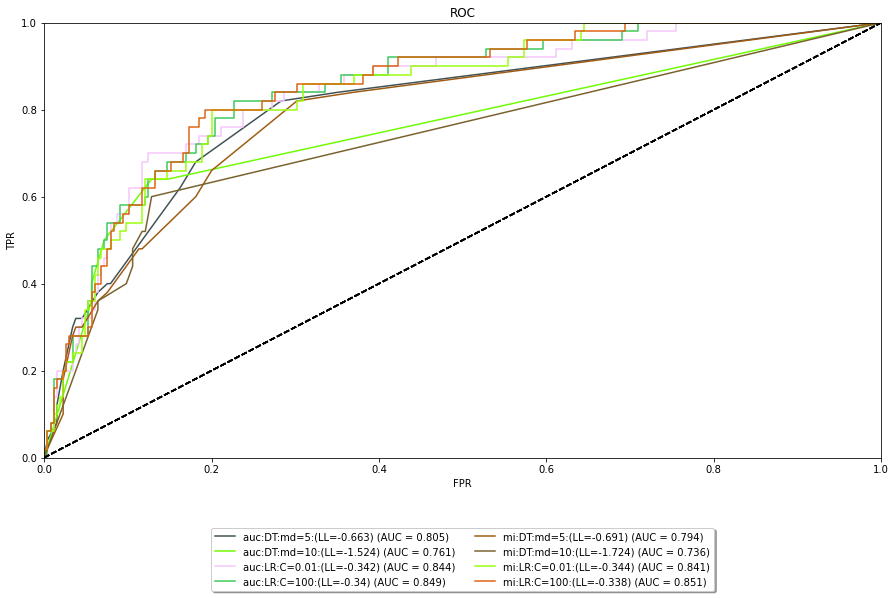

In [27]:
'''
Now do the following
1. Split the data into 80/20 train/test
2. For each set of features:
- build two decision trees (max_depth in {10, 20}) 
- build two logistic regression (C in {10**-2, 10**2})
- get the auc and log-loss on the test set
'''
from sklearn.linear_model import LogisticRegression


def getLogLoss(Ps, Ys, eps = 10**-6):
    return ((Ys == 1) * np.log(Ps + eps) + (Ys == 0) * np.log(1 - Ps + eps)).mean()

#Split into train and test randomly without using sklearn package
#Note, there are many ways to do this:

train_pct = 0.8
#1. create an array of n random uniform variables drawn on [0,1] range
rand = np.random.rand(reds_scaled.shape[0])
#2. Convert to boolean where True = random number < train_pct
rand_filt = (rand < train_pct)

#Use the filter to index data

train = reds_scaled[rand_filt]
test = reds_scaled[(rand_filt == False)]


fsets = [top5_auc, top5_mi]
fset_descr = ['auc', 'mi']
mxdepths = [5, 10]
Cs = [10**-2, 10**2]


#Set up plotting box
fig = plt.figure(figsize = (15, 8))
ax = plt.subplot(111)


for i, fset in enumerate(fsets):
    descr = fset_descr[i]
    #set training and testing data
    Y_train = train['is_good']
    X_train = train[fset]
    Y_test = test['is_good']
    X_test = test[fset]
    
    for d in mxdepths:
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
        dt.fit(X_train, Y_train)
        preds_dt = dt.predict_proba(X_test)[:, 1]
        ll_dt = getLogLoss(preds_dt, Y_test)
        
        plotUnivariateROC(preds_dt, Y_test, '{}:DT:md={}:(LL={})'.format(descr, d, round(ll_dt, 3)))

        
    for C in Cs:
        lr = LogisticRegression(C = C)
        lr.fit(X_train, Y_train)
        preds_lr = lr.predict_proba(X_test)[:, 1]
        ll_lr = getLogLoss(preds_lr, Y_test)

        plotUnivariateROC(preds_lr, Y_test, '{}:LR:C={}:(LL={})'.format(descr, C, round(ll_lr, 3)))

    
# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 2, prop = {'size':10})

### Feature Selection

In [28]:
vif_reds = pd.DataFrame()
vif_reds["feature"] = reds_scaled.columns[:-1]

vif_reds["VIF"] = [variance_inflation_factor(reds_scaled[reds_scaled.columns[:-1]].values, i) 
                          for i in range(len(reds_scaled[reds_scaled.columns[:-1]].columns))] 

vif_reds

,feature,VIF
0,fixed acidity,7.814194
1,volatile acidity,1.866593
2,citric acid,3.084088
3,residual sugar,2.002017
4,chlorides,1.448900
5,free sulfur dioxide,1.969745
6,total sulfur dioxide,2.240458
7,density,7.528407
8,pH,3.324713
9,sulphates,1.393500


In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000).fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_predict_prob = lr.predict_proba(x_test)[:,1]

In [30]:
lr_vif = LogisticRegression(max_iter = 1000).fit(x_train.drop("fixed acidity", axis=1), y_train)
lr_predict_vif = lr_vif.predict(x_test.drop("fixed acidity", axis=1))
lr_predict_prob_vif = lr_vif.predict_proba(x_test.drop("fixed acidity", axis=1))[:,1]

In [31]:
from sklearn.metrics import roc_curve, auc

def plot_ROC(truth,preds,label_string):
    fpr, tpr, thresholds = roc_curve(truth,preds)
    roc_auc = auc(fpr,tpr)
    
    
    #choose a random color for plotting:
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

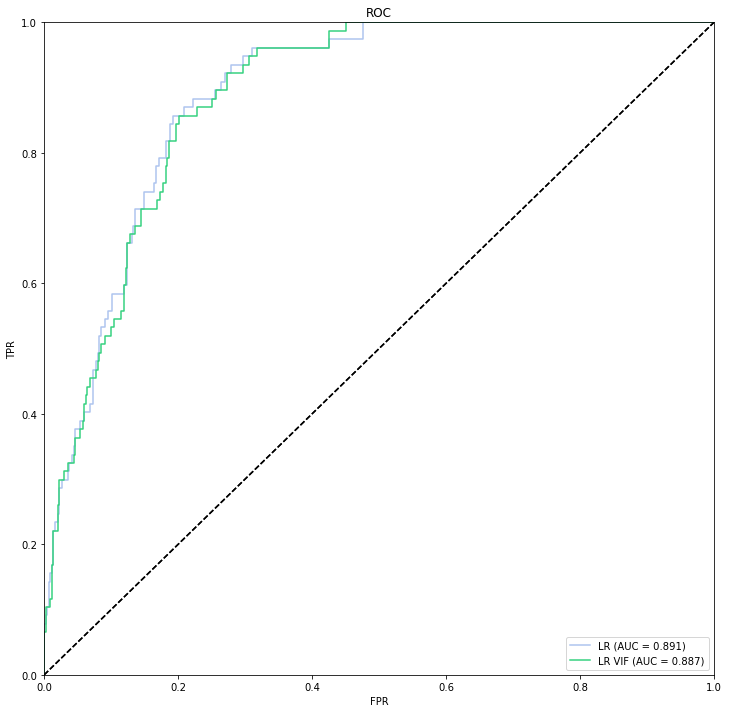

In [32]:
plt.rcParams['figure.figsize'] = 12, 12
plot_ROC(y_test,lr_predict_prob,"LR")
plot_ROC(y_test,lr_predict_prob_vif,"LR VIF")

Not worth removing highest VIF feature

### Data For Modeling -- NOTE TO TEAM

In [ ]:
#use these dfs:

#x_train
#x_test
#y_train
#y_test

#these are the dfs before being split into train/test:
#reds_scaled
#reds_x
#reds_y

### Unsupervised Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(reds_x)

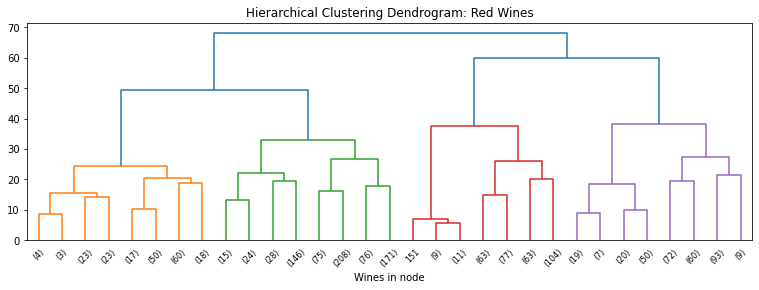

In [34]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(reds_x)
plt.figure(figsize=(13,4))
plt.title('Hierarchical Clustering Dendrogram: Red Wines')
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Wines in node")
plt.show()

K-means clustering

In [35]:
from sklearn.cluster import KMeans

kmeans_reds = KMeans(n_clusters=3, random_state=0).fit(reds_x)
labels_reds = KMeans(n_clusters=3, random_state=0).fit_predict(reds_x)

Text(0.5, 1.0, 'Red Wine KMeans')

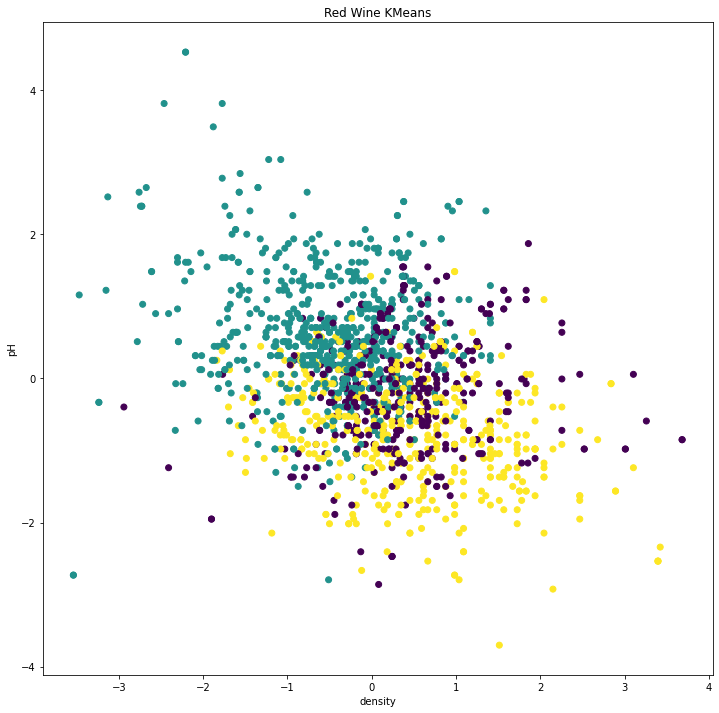

In [36]:
plt.scatter(reds_x['density'], reds_x['pH'], c = labels_reds)
plt.xlabel("density")
plt.ylabel("pH")
plt.title("Red Wine KMeans")

### Train Baseline Models

In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [43]:
#naive bayes

In [44]:
#knn/svm

### Baseline Model Evaluation

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [40]:
#rf
#mean roc_auc from five-fold cross-validation
np.mean(cross_val_score(rf, x_test, y_test, cv= 5, scoring = 'roc_auc'))

0.8835959503459503

In [47]:
#lr
#mean roc_auc from five-fold cross-validation
np.mean(cross_val_score(lr, x_test, y_test, cv=5, scoring = 'roc_auc'))

0.8716947496947498

### Tune with Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

Random Forest

In [43]:
#rf
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 25, 50],
             'min_samples_split': [2, 10], 'min_samples_leaf': [1,5,10],
             'class_weight': [None, 'balanced']}

search = GridSearchCV(rf, param_grid, cv=5, scoring = 'roc_auc')
search.fit(x_train, y_train)
search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [44]:
rf_tuned = RandomForestClassifier(class_weight = None, criterion = 'entropy', max_depth = 50,
                                  min_samples_leaf = 1, min_samples_split = 2)

Logistic Regression

In [70]:
#lr
import warnings
warnings.filterwarnings('ignore')
param_grid = {"C":[0.001,0.01,0.1,1,10,100,1000], "penalty":["l1","l2"], 
              "solver":["newton-cg","lbfgs","liblinear","sag","saga"]}
clf = GridSearchCV(lr, param_grid, cv=5, scoring = 'roc_auc')
clf.fit(x_train, y_train)
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [71]:
lr_tuned = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")

Naive Bayes

SVM/K-NN

### Model Evaluation

In [55]:
#rf
np.mean(cross_val_score(rf_tuned, x_test, y_test, cv= 5, scoring = 'roc_auc'))

0.8832760480260481

In [72]:
#lr
np.mean(cross_val_score(lr_tuned, x_test, y_test, cv=5, scoring='roc_auc'))

0.8764327431827432

In [51]:
#nb

In [52]:
#svm/knn

### ROC Curve Plot

In [ ]:
def plot_ROC(truth,preds,label_string):

    fpr, tpr, thresholds = roc_curve(truth,preds)
    roc_auc = auc(fpr,tpr)
    
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curves for Select Models')
    plt.legend(loc="lower right")

In [ ]:
dict_vals = {"RF": rf_predict_prob[:,1], "LR": lr_predict_prob[:,1],
            "KNN": knn_predict_prob[:,1], "NB": nb_predict_prob[:,1]}

fig = plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

for i in dict_vals:
    plot_ROC(y_test, dict_vals[i], i)